## Executive Summary

In Vitro Fertilization is an assisted reproductive technology commonly referred to as IVF.  IVF is the process of fertilization by extracting eggs, retrieving a sperm sample, and then manually combining an egg and sperm in a laboratory dish. 1% of births per year in the UK are a result of IVF treatment. 

The Human Fertilisation and Embryology Authority collects data and statistics about over 70,000 fertility treatments performed each year in the UK. 

__Can machine learning be used to build a predictive model using the data available?__

 > This capstone project is going to focus on predicting a successful live birth as a result of an IVF cycle. It will specifically be looking at the IVF procedures which had at least 1 embryo transfer performed. 
The success rate for procedures that have reached this stage is around 45%. 
The factors used as predictors will include the patient's and partner's ages, number of previous IVF cycles, number of previous live births, identified reason for infertility, number of previous pregnancies, the source of the sperm, the use of stimulation.  

Predictions will be performed using machine learning algorithms including Logistic Regression, Support Vector Machine, Gradient Boosting, Decision Tree Classifier and K-nearest Neighbors Algorithm. The model generated by each algorithm will be evaluated for precision and predictive accuracy.  A selection of algorithms with the highest accuracy and precision scores will be evaluated further.

The original data can be accessed here: https://www.hfea.gov.uk/about-us/our-data/guide-to-the-anonymised-register/ .

HFEA is an executive non-departmental public body of the Department of Health and Social Care in the United Kingdom. It is the UK’s independent regulator of fertility treatment and research using human embryos. HFEA is responsible for licensing, monitoring and inspecting fertility clinics.

### Data Preparation & Cleaning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
ivf = pd.read_excel("IVF.xlsx")

In [4]:
df_ivf = ivf.copy()

In [5]:
df = df_ivf

By default, the copy is a "deep copy" meaning that any changes made in the original DataFrame will not be reflected in the copy.

In [6]:
pd.set_option("display.max_columns", None)
df.head()

,Patient age at treatment,Total number of previous IVF cycles,Total number of previous DI cycles,Total number of previous pregnancies - IVF and DI,Total number of previous live births - IVF or DI,Causes of infertility - tubal disease,Causes of infertility - ovulatory disorder,Causes of infertility - male factor,Causes of infertility - patient unexplained,Causes of infertility - endometriosis,Main reason for producing embroys storing eggs,Stimulation used,Egg donor age at registration,Sperm donor age at registration,Donated embryo,Type of treatment - IVF or DI,Specific treatment type,PGT-M treatment,PGT-A treatment,Elective single embryo transfer,Egg source,Sperm source,Fresh cycle,Frozen cycle,Eggs thawed (0/1),Fresh eggs collected,Fresh eggs stored (0/1),Total eggs mixed,Total embryos created,Embryos transferred,Total embryos thawed,Embryos transferred from eggs micro-injected,Embryos stored for use by patient,Date of embryo transfer,Year of treatment,Live birth occurrence,Number of live births,Early outcome,Number of foetal sacs with fetal pulsation,Heart one weeks gestation,Heart one birth outcome,Heart one birth weight,Heart one sex,Heart one delivery date,Heart one birth congenital abnormalities,Heart two weeks gestation,Heart two birth outcome,Heart two birth weight,Heart two sex,Heart two delivery date,Heart two birth congenital abnormalities,Heart three weeks gestation,Heart three birth outcome,Heart three birth weight,Heart three sex,Heart three birth congenital abnormalities,Heart three delivery date,Patient ethnicity,Partner ethnicity,Partner Type,Partner age
0,45-50,3,0,0.0,0,0,0,0,0,0,Embryo storage,0,NaN,Between 36 and 40,0.0,IVF,ICSI,0,0,0.0,Patient,Donor,1.0,0.0,0,1-5,0,1-5,0,0.0,0,0.0,0,NaN,2017,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black,Other,Male,NaN
1,18-34,0,0,NaN,NaN,0,0,0,0,0,Donation,1,NaN,NaN,0.0,IVF,IVF,0,0,0.0,Patient,Partner,1.0,0.0,0,21-25,0,0,0,0.0,0,0.0,0,NaN,2018,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,Other,NaN,NaN
2,999,0,0,NaN,NaN,0,0,0,0,0,Donation,1,NaN,NaN,0.0,IVF,IVF,0,0,0.0,Patient,Partner,1.0,0.0,0,21-25,0,0,0,0.0,0,0.0,0,NaN,2018,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,NaN,NaN
3,18-34,0,0,NaN,NaN,0,0,1,0,0,Treatment - IVF,1,NaN,NaN,0.0,IVF,ICSI,0,0,1.0,Patient,Partner,1.0,0.0,0,1-5,0,1-5,1-5,1.0,0,1.0,1-5,5.0,2018,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,White,Male,18-34
4,18-34,1,0,NaN,0,0,0,1,0,0,Treatment - IVF,0,NaN,NaN,0.0,IVF,Unknown,0,0,0.0,Patient,Partner,0.0,1.0,0,0,0,0,0,1.0,1-5,NaN,0,0.0,2018,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,White,Male,18-34


In [7]:
df.shape

(169616, 61)

In [8]:
df.columns

Index(['Patient age at treatment', 'Total number of previous IVF cycles',
       'Total number of previous DI cycles',
       'Total number of previous pregnancies - IVF and DI',
       'Total number of previous live births - IVF or DI',
       'Causes of infertility - tubal disease',
       'Causes of infertility - ovulatory disorder',
       'Causes of infertility - male factor',
       'Causes of infertility - patient unexplained',
       'Causes of infertility - endometriosis',
       'Main reason for producing embroys storing eggs', 'Stimulation used',
       'Egg donor age at registration', 'Sperm donor age at registration',
       'Donated embryo', 'Type of treatment - IVF or DI',
       'Specific treatment type', 'PGT-M treatment', 'PGT-A treatment',
       'Elective single embryo transfer', 'Egg source', 'Sperm source',
       'Fresh cycle', 'Frozen cycle', 'Eggs thawed (0/1)',
       'Fresh eggs collected', 'Fresh eggs stored (0/1)', 'Total eggs mixed',
       'Total embryos 

In [9]:
pd.set_option("display.max_rows", None)
df.isna().sum()

Patient age at treatment                                  0
Total number of previous IVF cycles                       0
Total number of previous DI cycles                        0
Total number of previous pregnancies - IVF and DI    126928
Total number of previous live births - IVF or DI      64529
Causes of infertility - tubal disease                     0
Causes of infertility - ovulatory disorder                0
Causes of infertility - male factor                       0
Causes of infertility - patient unexplained               0
Causes of infertility - endometriosis                     0
Main reason for producing embroys storing eggs            0
Stimulation used                                          0
Egg donor age at registration                        160975
Sperm donor age at registration                      144738
Donated embryo                                        11282
Type of treatment - IVF or DI                             0
Specific treatment type                 

Some of the columns are mainly associated with the Donation & Storage of embryos, as I will only be looking at the IVF Treatments, I can identify columns that are not relevant.

Also, I can see that several columns have the majority values missing. These columns are associated with the outcome of the successful treatment. However, as I will be aiming to predict the success of the IVF treatment, I will not be needing them. 

In [10]:
df['Main reason for producing embroys storing eggs'].value_counts()

Treatment - IVF    137186
Embryo storage      13326
Treatment - DI      11282
Donation             3578
Egg storage          3401
Egg share             825
Undefined              18
Name: Main reason for producing embroys storing eggs, dtype: int64

In [11]:
df = df[df['Main reason for producing embroys storing eggs'] == 'Treatment - IVF']

In [12]:
df['Patient age at treatment'].value_counts()

18-34    56387
35-37    32023
38-39    20307
40-42    19201
43-44     5757
45-50     3496
999         15
Name: Patient age at treatment, dtype: int64

In [13]:
df[df['Patient age at treatment'] == 999 ].head(5)

,Patient age at treatment,Total number of previous IVF cycles,Total number of previous DI cycles,Total number of previous pregnancies - IVF and DI,Total number of previous live births - IVF or DI,Causes of infertility - tubal disease,Causes of infertility - ovulatory disorder,Causes of infertility - male factor,Causes of infertility - patient unexplained,Causes of infertility - endometriosis,Main reason for producing embroys storing eggs,Stimulation used,Egg donor age at registration,Sperm donor age at registration,Donated embryo,Type of treatment - IVF or DI,Specific treatment type,PGT-M treatment,PGT-A treatment,Elective single embryo transfer,Egg source,Sperm source,Fresh cycle,Frozen cycle,Eggs thawed (0/1),Fresh eggs collected,Fresh eggs stored (0/1),Total eggs mixed,Total embryos created,Embryos transferred,Total embryos thawed,Embryos transferred from eggs micro-injected,Embryos stored for use by patient,Date of embryo transfer,Year of treatment,Live birth occurrence,Number of live births,Early outcome,Number of foetal sacs with fetal pulsation,Heart one weeks gestation,Heart one birth outcome,Heart one birth weight,Heart one sex,Heart one delivery date,Heart one birth congenital abnormalities,Heart two weeks gestation,Heart two birth outcome,Heart two birth weight,Heart two sex,Heart two delivery date,Heart two birth congenital abnormalities,Heart three weeks gestation,Heart three birth outcome,Heart three birth weight,Heart three sex,Heart three birth congenital abnormalities,Heart three delivery date,Patient ethnicity,Partner ethnicity,Partner Type,Partner age
2691,999,1,0,1.0,1,0,0,0,0,0,Treatment - IVF,0,NaN,NaN,0.0,IVF,ICSI,0,0,1.0,Patient,Partner,0.0,1.0,0,0,0,0,0,1.0,1-5,1.0,0,4.0,2017,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,None,NaN
2697,999,0,0,NaN,NaN,0,0,0,0,0,Treatment - IVF,1,NaN,NaN,0.0,IVF,ICSI,0,0,1.0,Patient,Partner,1.0,0.0,0,16-20,0,11-15,6-10,1.0,0,1.0,1-5,5.0,2017,1,1,Intrauterine Fetal Pulsation Seen,1,39,Live Birth,Between 2.5kg and 2.99Kg,F,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,None,NaN
2707,999,1,0,NaN,0,0,0,0,0,0,Treatment - IVF,1,NaN,NaN,0.0,IVF,IVF,0,0,0.0,Patient,Partner,1.0,0.0,0,21-25,0,21-25,6-10,2.0,0,NaN,0,5.0,2017,1,1,Intrauterine Fetal Pulsation Seen,1,39,Live Birth,Between 3.5kg and 3.99Kg,F,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,None,NaN
2709,999,5,0,NaN,0,0,0,0,0,0,Treatment - IVF,0,NaN,NaN,0.0,IVF,ICSI,0,0,0.0,Patient,Partner,0.0,1.0,0,0,0,0,0,0.0,6-10,0.0,0,NaN,2017,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,None,NaN
2748,999,1,0,1.0,0,0,0,0,0,0,Treatment - IVF,1,NaN,NaN,0.0,IVF,IVF,0,0,0.0,Patient,Partner,1.0,0.0,0,6-10,0,6-10,1-5,1.0,0,NaN,0,3.0,2017,1,1,Intrauterine Fetal Pulsation Seen,1,40,Live Birth,Between 2.5kg and 2.99Kg,F,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,None,NaN


I will be dropping these columns because the cause of infertility is not identified, and these columns will be some of my main predictors in the models.

In [14]:
df = df[df['Patient age at treatment'] != 999 ]

In [15]:
check_nan = df['Patient age at treatment'].isnull().values.any()

print(check_nan)

False


In [16]:
df['patient_age_cleaned'] = df['Patient age at treatment'].apply(lambda x: '18-34' if x == '18-34' else
                                                                           '35-39' if x == '35-37' else
                                                                           '35-39' if x ==  '38-39' else
                                                                            '40-50')

In [17]:
df['patient_age_cleaned'].value_counts()

18-34    56387
35-39    52330
40-50    28454
Name: patient_age_cleaned, dtype: int64

I have tried using the original ranges in my model but it ended up creating too much noise and  reducing the number of bins has improved my scores slightly.  

In [18]:
df['Embryos transferred'].value_counts()

1.0    80883
2.0    37426
0.0    16995
3.0     1867
Name: Embryos transferred, dtype: int64

__Typical treatment follows the main steps:__

Step 1: suppressing the natural menstrual cycle

Step 2: helping ovaries produce more eggs

Step 3: collecting the eggs

Step 4: fertilising the eggs

Step 5: embryo transfer  

In [19]:
df = df[df['Embryos transferred'] > 0]

>Step 5: embryo transfer -

The number of embryos transferred is discussed before treatment starts and it usually depends on age. The best quality embryo(s) will have been selected with the highest chances of producing a viable pregnancy. 

I will be looking only at treatments that have successfully reached stage 5 of the process and had at least one embryo transferred. Embryo implantation failure could happen either due to a problem with the embryos or a problem with the uterus. The IVF process is complicated and there is no way to figure out the stage at which the success is being blocked. 

In [20]:
df['Total number of previous IVF cycles'].value_counts()

0     41726
1     33419
2     19733
3     11041
4      6136
>5     4709
5      3412
Name: Total number of previous IVF cycles, dtype: int64

In [21]:
df['Total number of previous IVF cycles'] = df['Total number of previous IVF cycles'].replace({'>5': '6'}, regex=True).astype('int')

This column will be most useful to me as a numerical column. It is important to keep in mind that 6 will mean 6 or more previous cycles.

In [22]:
df['Total number of previous IVF cycles'].value_counts()

0    41726
1    33419
2    19733
3    11041
4     6136
6     4709
5     3412
Name: Total number of previous IVF cycles, dtype: int64

In [23]:
df['Total number of previous pregnancies - IVF and DI'].value_counts()

1.0    21712
0.0     5458
2.0     2767
3.0      303
4.0       49
5.0       14
Name: Total number of previous pregnancies - IVF and DI, dtype: int64

In [24]:
df['total_previous_pregnancies'] = df['Total number of previous pregnancies - IVF and DI'].apply(lambda x: 0 if x == 0 else
                                                                                                           1 if x == 1 else
                                                                                                           2)

From the value counts above it can be noted that 3 and more previous pregnancies are outliers. I am applying the lambda function to create a new column total_previous_pregnancies' where the value 2 will mean 2 and 2+.

In [25]:
df['total_previous_pregnancies'].value_counts()

2    93006
1    21712
0     5458
Name: total_previous_pregnancies, dtype: int64

In [26]:
df['Total number of previous live births - IVF or DI'].value_counts()

0     60516
1     18013
2       934
3        71
>3       17
Name: Total number of previous live births - IVF or DI, dtype: int64

In [27]:
df['Total number of previous live births - IVF or DI'] = df['Total number of previous live births - IVF or DI'].replace({'>': ''}, regex=True)

For now, I will only remove the '>' because there are some missing values in this column and I will be looking to potentially them later on.

In [28]:
df['Causes of infertility - tubal disease'].value_counts()

0    107665
1     12511
Name: Causes of infertility - tubal disease, dtype: int64

Tubal disease — when a fallopian tube becomes blocked or damage — is a common cause of female infertility.

In [29]:
df['Causes of infertility - ovulatory disorder'].value_counts()

0    105853
1     14323
Name: Causes of infertility - ovulatory disorder, dtype: int64

Conditions that affect the normal ovulation process resulting in failed or irregular ovulation are called ovulatory disorders. 

In [30]:
df['Causes of infertility - male factor'].value_counts()

0    78965
1    41211
Name: Causes of infertility - male factor, dtype: int64

In [31]:
df['Causes of infertility - patient unexplained'].value_counts()

0    82653
1    37523
Name: Causes of infertility - patient unexplained, dtype: int64

Unexplained infertility is where its cause remains unknown even after an infertility work-up, usually including semen analysis in the man and assessment of ovulation and fallopian tubes in the woman. 

In [32]:
df['Causes of infertility - endometriosis'].value_counts()

0    113054
1      7122
Name: Causes of infertility - endometriosis, dtype: int64

A disorder in which the tissue similar to the inner lining of the uterus (endometrium) grows outside the uterus.

In [33]:
df['Stimulation used'].value_counts()

1    67357
0    52819
Name: Stimulation used, dtype: int64

Set of fertility procedures that help conceiving by artificially fertilising the retrieved ovaries with sperm.

In [34]:
df['Donated embryo'].value_counts()

0.0    118582
1.0      1594
Name: Donated embryo, dtype: int64

In [35]:
df['Elective single embryo transfer'].value_counts()

0.0    67373
1.0    52803
Name: Elective single embryo transfer, dtype: int64

In [36]:
df['Egg source'].value_counts()

Patient    112733
Donor        7443
Name: Egg source, dtype: int64

In [37]:
df['Sperm source'].value_counts()

Partner    109458
Donor       10667
Name: Sperm source, dtype: int64

In [38]:
df['Fresh cycle'].value_counts()

1.0    71885
0.0    48291
Name: Fresh cycle, dtype: int64

In [39]:
df['Frozen cycle'].value_counts()

0.0    71953
1.0    48223
Name: Frozen cycle, dtype: int64

In [40]:
df['Early outcome'].value_counts()

None                                 61804
Intrauterine Fetal Pulsation Seen    44441
Biochemical Pregnancy Only            8653
Miscarriage                           4735
Ectopic/Hetrotopic                     516
Name: Early outcome, dtype: int64

In [41]:
df['Early outcome'] = df['Early outcome'].astype('str')

In [42]:
df['Partner Type'].value_counts()

Male         113908
Female         3674
None           2007
Surrogate       586
Name: Partner Type, dtype: int64

In [43]:
df['Partner age'].value_counts()

18-34    36087
35-37    24336
40-42    16097
38-39    15111
45-50    11625
43-44     7626
51-55     2958
56-60      967
>60        513
999          4
Name: Partner age, dtype: int64

In [44]:
df = df[df['Partner age'] != 999 ]

In [45]:
count_nan = df['Partner age'].isnull().sum()
count_nan

4852

In [46]:
df = df.dropna(subset=['Partner age'])

In [47]:
df['partner_age_cleaned'] =  df['Partner age'].apply(lambda x: '18-34' if x == '18-34' else
                                                                           '35-39' if x == '35-37' else
                                                                           '35-39' if x ==  '38-39' else
                                                                            '40-60')

Again, to reduce noise for better model performance, I removed the rows with values that don't make logical sense (999), removed the rows with the missing values, and then applied the lambda function.

In [48]:
df['partner_age_cleaned'].value_counts()

40-60    39786
35-39    39447
18-34    36087
Name: partner_age_cleaned, dtype: int64

Male age can impact fertility in a number of ways. First, the older a man is, the longer it takes him to conceive a child. This is due in part to the fact that older men tend to have more chronic health conditions (things like diabetes and high blood pressure can negatively affect fertility), but also because sperm quality decreases with age.

In [49]:
df = df[['patient_age_cleaned', 'Total number of previous IVF cycles',
       'Total number of previous live births - IVF or DI',
       'Causes of infertility - tubal disease',
       'Causes of infertility - ovulatory disorder',
       'Causes of infertility - male factor',
       'Causes of infertility - patient unexplained',
       'Causes of infertility - endometriosis',
       'Stimulation used',
       'Sperm source','Frozen cycle','Egg source',
       'Embryos transferred', 'Number of live births',
       'total_previous_pregnancies','Early outcome',
       'partner_age_cleaned']]

In [50]:
df = df.rename(
columns = {
           'patient_age_cleaned':'patient_age',
           'partner_age_cleaned':'partner_age',
           'Total number of previous IVF cycles': 'previous_IVF_cycles',
           'total_previous_pregnancies': 'total_previous_pregnancies',
           'Total number of previous live births - IVF or DI':'previous_live_births',
           'Causes of infertility - tubal disease': 'tubal_disease',
           'Causes of infertility - ovulatory disorder': 'ovulatory_disorder',
           'Causes of infertility - male factor': 'male_factor',
           'Causes of infertility - patient unexplained': 'patient_unexplained_infertility',
           'Causes of infertility - endometriosis': 'endometriosis',
           'Stimulation used': 'stimulation_used',
           'Sperm source': 'sperm_source', 
           'Frozen cycle': 'frozen_cycle',
           'Egg source': 'egg_source',
           'Embryos transferred': 'embryos_transferred', 
           'Early outcome':'early_outcome',
           'Number of live births': 'number_of_livebirths'

})

After the initial analysis of the columns, these are the columns I have decided to concentrate on going forward. I renamed them to make them easier and cleaner to use. 

In [51]:
df.head()

,patient_age,previous_IVF_cycles,previous_live_births,tubal_disease,ovulatory_disorder,male_factor,patient_unexplained_infertility,endometriosis,stimulation_used,sperm_source,frozen_cycle,egg_source,embryos_transferred,number_of_livebirths,total_previous_pregnancies,early_outcome,partner_age
3,18-34,0,NaN,0,0,1,0,0,1,Partner,0.0,Patient,1.0,0,2,None,18-34
4,18-34,1,0,0,0,1,0,0,0,Partner,1.0,Patient,1.0,0,2,None,18-34
5,40-50,0,NaN,0,0,0,1,0,1,Partner,0.0,Patient,1.0,0,2,None,40-60
6,40-50,0,NaN,0,0,1,0,0,1,Partner,0.0,Patient,2.0,0,2,None,35-39
7,18-34,0,NaN,0,1,1,0,0,1,Partner,0.0,Patient,1.0,0,2,None,18-34


In [52]:
df.shape

(115320, 17)

In [53]:
len(df[(df.tubal_disease == 0) & (df.ovulatory_disorder == 0)& (df.male_factor == 0)& (df.endometriosis == 0)& (df.patient_unexplained_infertility == 0)])

17232

I have decided to drop the rows that don't have any values in any of the columns related to the cause of infertility.
Alternatively, I could create a new column 'other causes'.

In [54]:
df = df[(df.tubal_disease != 0) | (df.ovulatory_disorder != 0)| (df.male_factor != 0)| (df.endometriosis != 0)| (df.patient_unexplained_infertility != 0)]

In [55]:
df.loc[:, df.columns!='early_outcome'].duplicated().sum()

83292

In [56]:
df.drop_duplicates(subset=df.columns.difference(['early_outcome']),inplace = True)

From an algorithm evaluation perspective, duplicate rows will result in misleading performance. It can result in an optimistically biased estimate of performance on unseen data.

In [57]:
df.shape

(14796, 17)

In [58]:
df.isna().sum()

patient_age                           0
previous_IVF_cycles                   0
previous_live_births               1191
tubal_disease                         0
ovulatory_disorder                    0
male_factor                           0
patient_unexplained_infertility       0
endometriosis                         0
stimulation_used                      0
sperm_source                         13
frozen_cycle                          0
egg_source                            0
embryos_transferred                   0
number_of_livebirths                  0
total_previous_pregnancies            0
early_outcome                         0
partner_age                           0
dtype: int64

In [59]:
df.previous_live_births = df.previous_live_births.fillna(0)

The most common value for previous_live_births column is zero. Assuming the patient had no live birth in the past, it would make sense that missing values mean 0. So, I based on that assumption I will impute the missing cells with 0. 

In [60]:
df = df.dropna()

I will drop 13 rows that don't have the sperm_source specified as it is not a significant number. 

In [61]:
df.number_of_livebirths.value_counts()

0    8490
1    5025
2    1226
3      42
Name: number_of_livebirths, dtype: int64

In [62]:
df['livebirth'] = df.number_of_livebirths.apply(lambda x: 0 if x == 0 else 1)

livebirth - this will be my target column, where 1 means the treatment resulted in a live birth and 0 - it did not. 

In [63]:
df['livebirth'].value_counts(normalize = True)

0    0.574308
1    0.425692
Name: livebirth, dtype: float64

In [64]:
df.dtypes

patient_age                         object
previous_IVF_cycles                  int64
previous_live_births                object
tubal_disease                        int64
ovulatory_disorder                   int64
male_factor                          int64
patient_unexplained_infertility      int64
endometriosis                        int64
stimulation_used                     int64
sperm_source                        object
frozen_cycle                       float64
egg_source                          object
embryos_transferred                float64
number_of_livebirths                 int64
total_previous_pregnancies           int64
early_outcome                       object
partner_age                         object
livebirth                            int64
dtype: object

In [65]:
df.patient_age.value_counts()

35-39    5652
18-34    4994
40-50    4137
Name: patient_age, dtype: int64

In [66]:
df.previous_live_births.value_counts()

0    9920
1    4273
2     542
3      44
3       4
Name: previous_live_births, dtype: int64

In [67]:
df.previous_live_births = df.previous_live_births.astype('int')

In [68]:
df.early_outcome.value_counts()

Intrauterine Fetal Pulsation Seen    6864
None                                 6356
Biochemical Pregnancy Only            967
Miscarriage                           534
Ectopic/Hetrotopic                     56
nan                                     6
Name: early_outcome, dtype: int64

In [69]:
df[df.early_outcome == 'nan']

,patient_age,previous_IVF_cycles,previous_live_births,tubal_disease,ovulatory_disorder,male_factor,patient_unexplained_infertility,endometriosis,stimulation_used,sperm_source,frozen_cycle,egg_source,embryos_transferred,number_of_livebirths,total_previous_pregnancies,early_outcome,partner_age,livebirth
18156,40-50,5,0,0,0,0,1,0,1,Partner,0.0,Patient,3.0,0,1,nan,40-60,0
20914,18-34,2,0,0,0,1,1,0,1,Partner,0.0,Patient,1.0,0,2,nan,40-60,0
35332,35-39,5,2,0,1,0,0,0,0,Partner,1.0,Patient,2.0,1,2,nan,35-39,1
42088,40-50,5,1,0,0,0,1,0,0,Partner,1.0,Patient,2.0,0,1,nan,35-39,0
47851,40-50,2,0,0,0,0,1,0,0,Partner,0.0,Patient,1.0,0,2,nan,40-60,0
144205,35-39,6,2,1,0,0,1,0,0,Partner,1.0,Patient,1.0,0,2,nan,35-39,0


In [70]:
df = df[(df.early_outcome != 'nan')]

### EDA

In [71]:
df.to_csv('ivfeda.csv')

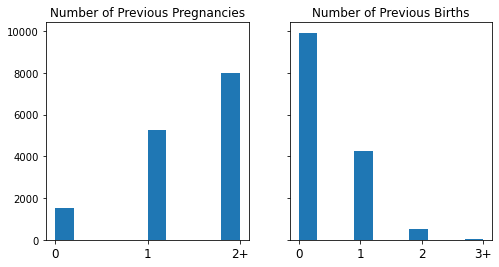

In [72]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey = True)

ax[0].hist(df.total_previous_pregnancies)
ax[0].set_title('Number of Previous Pregnancies')
ax[0].set(xticks = [0,1,2])
ax[0].set_xticklabels(['0','1','2+'], fontsize=12)

ax[1].hist(df.previous_live_births)
ax[1].set_title('Number of Previous Births')
ax[1].set(xticks = [0,1,2,3])
ax[1].set_xticklabels(['0','1','2','3+'], fontsize=12);

From the histogram visualisations we can see that 'previous_live_births' & 'total_previous_pregnancies' present an interesting picture: the most frequent count of 'total_previous_pregnancies' is 2 but for 'previous_live_births' is 0. This implies that people going through the procedure were likely to have had an unsuccessful pregnancy in the past.

Interestingly, for the majority of the lab cases in this sample, it would not be the first IVF cycle. When cleaning the data I dropped the rows with lab cases where no embryos were successfully transferred. It can be suggested that for the majority of first IVF cycle lab cases no embryos end up being transferred. 

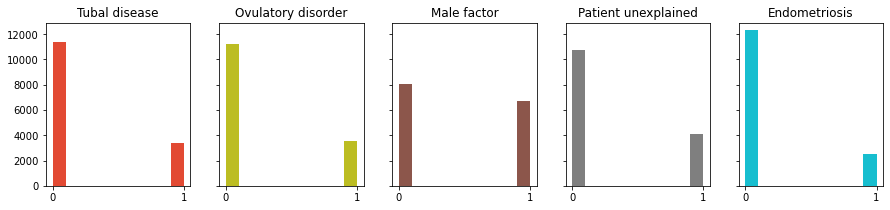

In [73]:
figure, ax = plt.subplots(1,5, figsize=(15,3), sharey = True)

ax[0].hist(df.tubal_disease, color = "#e24a33")
ax[0].set_title('Tubal disease')
ax[0].set(xticks = [0,1])

ax[1].hist(df.ovulatory_disorder, color = '#bcbd22')
ax[1].set_title('Ovulatory disorder')
ax[1].set(xticks = [0,1])

ax[2].hist(df.male_factor, color = '#8c564b')
ax[2].set_title('Male factor')
ax[2].set(xticks = [0,1])

ax[3].hist(df.patient_unexplained_infertility, color = '#7f7f7f')
ax[3].set_title('Patient unexplained')
ax[3].set(xticks = [0,1])

ax[4].hist(df.endometriosis, color = '#17becf')
ax[4].set_title('Endometriosis')
ax[4].set(xticks = [0,1]);




In [74]:
#df[(df.male_factor != 0) & (df.tubal_disease != 0) | (df.ovulatory_disorder != 0)| (df.endometriosis != 0)| (df.patient_unexplained_infertility != 0)].head()


Of the columns that relate to the infertility cause, male_factor looks like the most balanced one. It is also possible for patients to have more than one factor affecting their infertility.

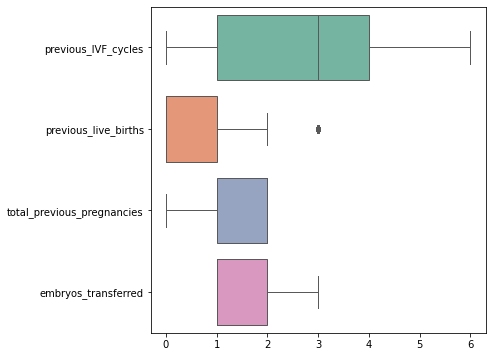

In [75]:
fig, ax = plt.subplots(figsize=(6,6))

sns.boxplot(data=df[['previous_IVF_cycles', 'previous_live_births',
      'total_previous_pregnancies', 'embryos_transferred']], orient='h', fliersize=5,
            linewidth=1,  saturation= 0.7, ax=ax, palette="Set2")

plt.show()

We observe that there is a greater variability for 'previous_IVF_cycles'.

We can observe that the column 'previous_live_births' has outliers - 50 lab cases with 3 previous life births. 

Also, since the notches in the boxplots for 'previous_IVF_cycles' and 'previous_live_births' do not overlap, we can conclude that with 95% confidence, the true medians do differ.

In [76]:
df.previous_live_births = df.previous_live_births.apply(lambda x: 0 if x == 0 else 1)

In [77]:
df.previous_live_births.value_counts()

0    9917
1    4860
Name: previous_live_births, dtype: int64

As this is the only numerical column with outliers I have decided to turn it into a binary column where 1 would indicate a successful birth in the past.

In [78]:
grouped_age_birth = df.groupby(['patient_age','livebirth'])

In [79]:
grouped_age_birth.apply(pd.DataFrame.mode).reset_index(drop=True)

,patient_age,previous_IVF_cycles,previous_live_births,tubal_disease,ovulatory_disorder,male_factor,patient_unexplained_infertility,endometriosis,stimulation_used,sperm_source,frozen_cycle,egg_source,embryos_transferred,number_of_livebirths,total_previous_pregnancies,early_outcome,partner_age,livebirth
0,18-34,1,0,0,0,0,0,0,0,Partner,1.0,Patient,1.0,0,2,None,18-34,0
1,18-34,1,0,0,0,0,0,0,0,Partner,1.0,Patient,1.0,1,2,Intrauterine Fetal Pulsation Seen,18-34,1
2,35-39,2,0,0,0,0,0,0,0,Partner,1.0,Patient,1.0,0,2,None,35-39,0
3,35-39,1,0,0,0,0,0,0,0,Partner,0.0,Patient,1.0,1,2,Intrauterine Fetal Pulsation Seen,35-39,1
4,40-50,2,0,0,0,0,0,0,0,Partner,0.0,Patient,1.0,0,2,None,40-60,0
5,40-50,1,0,0,0,0,0,0,0,Partner,0.0,Patient,1.0,1,2,Intrauterine Fetal Pulsation Seen,40-60,1


One of the insights that can be noted from the grouping above is that 2 is the mode number of the previous number of IVF cycles for treatments that were not successful for all age groups, compared to 1 for those that were successful. 

### Normalized relative frequency of the target class per category.
Normalized distribution of each class per feature and plotted the difference between positive and negative frequencies.

Relative frequency or experimental probability is calculated from the number of times an event happens, divided by the total number of trials in an actual experiment.

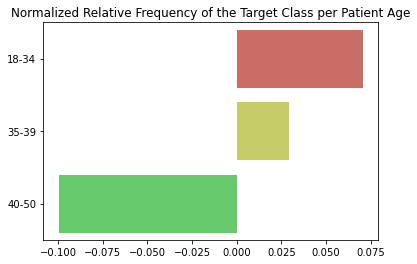

In [80]:
plt.figure(figsize=(6,4))
pos_counts = df.loc[df.livebirth.values == 1, 'patient_age'].value_counts() # output: {'35-39': 2510, '18-34': 2381, '40-50': 1400}
neg_counts = df.loc[df.livebirth.values == 0, 'patient_age'].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
freq_pos = (df.livebirth.values == 1).sum()
freq_neg = (df.livebirth.values == 0).sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k,0) / freq_pos - neg_counts.get(k,0)/ freq_neg for k in all_counts]
coolwarm = sns.color_palette("hls")
sns.set_palette(coolwarm)   
sns.barplot(x = all_counts,y = all_index,order = ["18-34", "35-39", "40-50"])
plt.title('Normalized Relative Frequency of the Target Class per Patient Age');

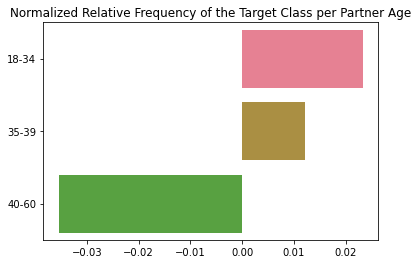

In [81]:
plt.figure(figsize=(6,4))
pos_counts = df.loc[df.livebirth.values == 1, 'partner_age'].value_counts()
neg_counts = df.loc[df.livebirth.values == 0, 'partner_age'].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
freq_pos = (df.livebirth.values == 1).sum()
freq_neg = (df.livebirth.values == 0).sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k,0) / freq_pos - neg_counts.get(k,0)/ freq_neg for k in all_counts]
coolwarm = sns.color_palette("husl")
sns.set_palette(coolwarm)    
sns.barplot(x = all_counts,y = all_index,order = ["18-34", "35-39", "40-60"])
plt.title('Normalized Relative Frequency of the Target Class per Partner Age');

Positive values imply this category favours those that will have birth occurrences and negative values categories that will not have birth occurrences. For patience and partners, the older category is being favoured by the negative outcomes (more for patients than for partners slightly).

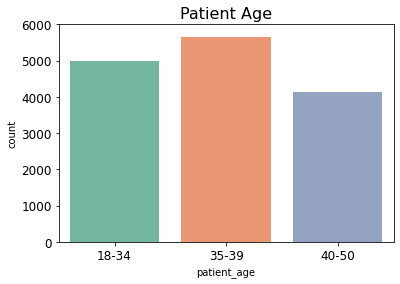

In [82]:
dims1 = (6.0, 4.0)
fig, ax = plt.subplots(figsize=dims1)
coolwarm = sns.color_palette("Set2")
sns.set_palette(coolwarm)
sns.countplot(x=df.patient_age, data=df, \
              order=['18-34', '35-39','40-50'])
plt.title('Patient Age', fontsize=16)
ax.set(ylim=(.0, 6000))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

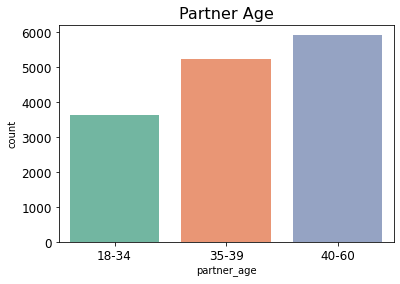

In [83]:
dims1 = (6.0, 4.0)
fig, ax = plt.subplots(figsize=dims1)
coolwarm = sns.color_palette("Set2")
sns.set_palette(coolwarm)
sns.countplot(x=df.partner_age, data=df, \
              order=['18-34', '35-39','40-60'])
plt.title('Partner Age', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);


Interestingly, the most frequent count for age for men is >40. Women are a lot less likely to go through the procedure after the age of 40. 

In [84]:
df['patient_age'] = pd.Categorical(df['patient_age'], ['18-34', '35-39','40-50'])

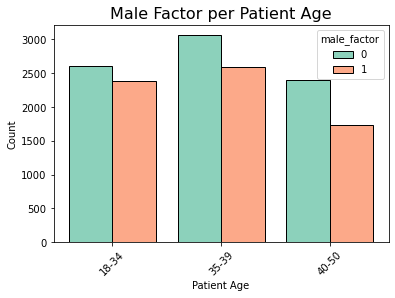

In [85]:
sns.histplot(data=df, x="patient_age", hue="male_factor", multiple="dodge", shrink = .8)
plt.title('Male Factor per Patient Age', fontsize=16)

#add axis titles
plt.xlabel('Patient Age')
plt.ylabel('Count')

#rotate x-axis labels
plt.xticks(rotation=45);

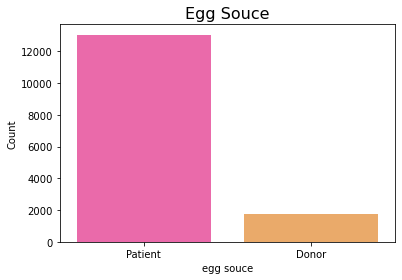

In [86]:
sns.countplot(data=df, x='egg_source', palette='spring')
plt.title('Egg Souce', fontsize=16)

#add axis titles
plt.xlabel('egg souce');
plt.ylabel('Count');

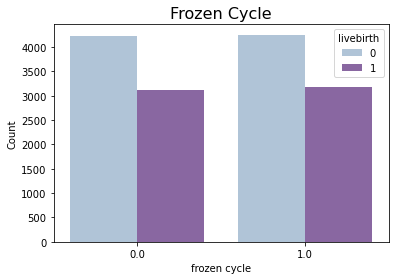

In [87]:
plt.title('Frozen Cycle', fontsize=16)

sns.countplot(x='frozen_cycle',data=df, hue='livebirth', palette='BuPu' )
plt.xlabel('frozen cycle')
plt.ylabel('Count');

It doesn't look like the frozen cycle has a direct relationship with the outcome of the procedure. 

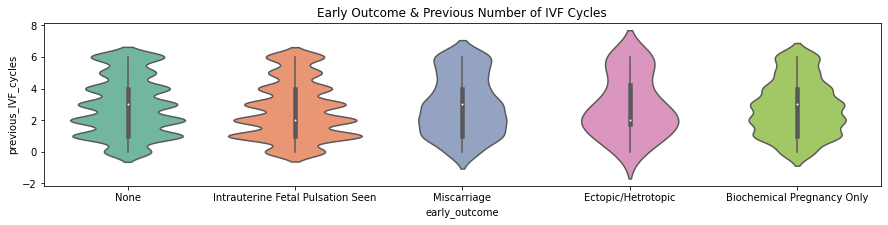

In [88]:
f, ax = plt.subplots(figsize=(15, 3))
sns.violinplot(x=df.early_outcome, y=df.previous_IVF_cycles).set(title="Early Outcome & Previous Number of IVF Cycles");


It looks like the outcomes 'None' & 'Miscarriage' have a slightly higher density around 6 than other outcomes. IFPS has the highest density between 1 and 2.

__Multicollinearity__

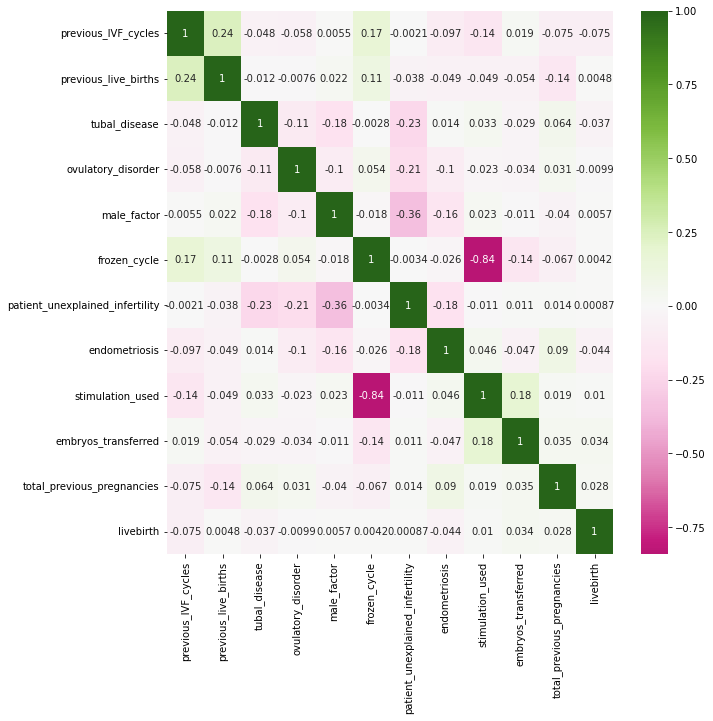

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['previous_IVF_cycles', 'previous_live_births',
       'tubal_disease', 'ovulatory_disorder', 'male_factor', 'frozen_cycle',
       'patient_unexplained_infertility', 'endometriosis', 'stimulation_used',
       'embryos_transferred', 'total_previous_pregnancies',
       'livebirth']].corr(), annot=True, center=0, cmap="PiYG")
plt.show()

'unexplained_infertility' has a slightly more noticable correlation with other columns that refer to the causes for infertility. 

'previous_IVF_cycles' has some correlation to 'previous_live_births'.

These correlations are not significant enough to be the point of concern.

Stimulation_used is highly negatively correlated to the frozen_cycle column. It makes sense because stimulation can only be performed with fresh cycles. 

In [90]:
cat_var = ['patient_age','sperm_source', 'partner_age', 'early_outcome','egg_source']

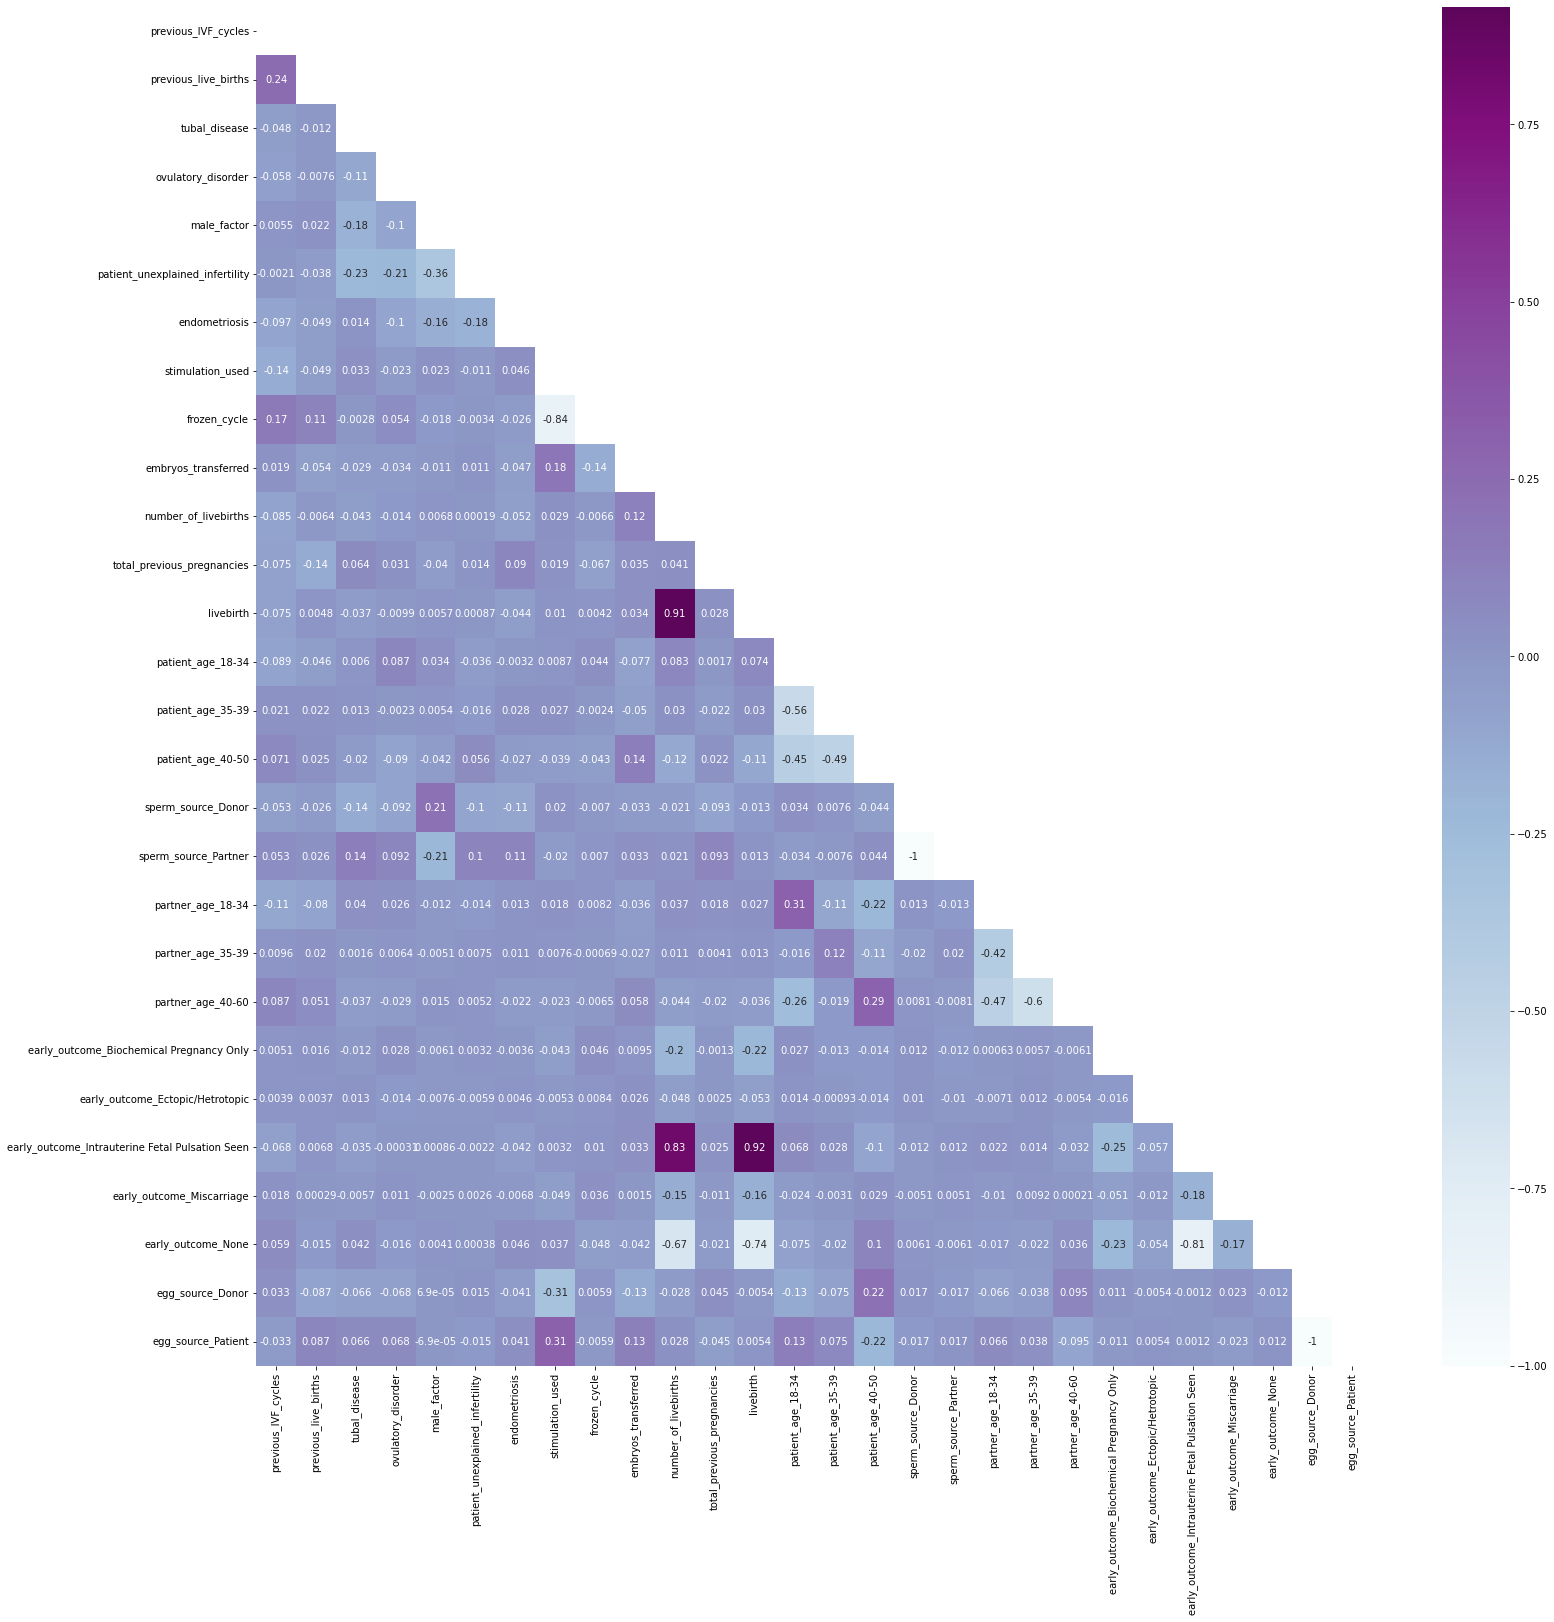

In [91]:
df_dummies = pd.get_dummies(data = df, columns = cat_var)
corr= df_dummies.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

plt.figure(figsize=(25,25))
sns.heatmap(df_dummies.corr(), annot=True, center=0, cmap="BuPu", mask = matrix)
plt.show()

I have dummified my categorical variables to further investigate any potential correlations. 

There are some noticable correlations between patiens' and partners' ages.

Again, early_outcome column is correlated to the target variable but I will only be using this column for the EDA.
 


__Cramér’s V statistic__ is a commonly used measure of association between two categorical variables. It takes on values between 0 and 1 (inclusive), with 0 corresponding to no association between the variables and 1 corresponding to one variable being completely determined by the other.

Using it I can check for correlation between my categorical variables and not just individual categories within them as done above with dummification.

In [92]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [93]:
confusion_matrix = pd.crosstab(df["partner_age"], df["patient_age"])
cramers_v(confusion_matrix.values)

0.27850233955577697

After looking at the correlations between individual categories within the categorical columns it is not surprising that there is some correlation between these two columns. 

In [94]:
confusion_matrix = pd.crosstab(df["male_factor"], df["sperm_source"])
cramers_v(confusion_matrix.values)

0.2144281849000796

__Hypothesis:__ The probability of an IVF cycle being successful at stage 5 is impacted by a number of factors related to the patient's medical history, external factors & IVF process itself.

## MODELING

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, roc_auc_score, precision_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import scikitplot as skplt
from matplotlib.colors import ListedColormap

In [96]:
df.columns

Index(['patient_age', 'previous_IVF_cycles', 'previous_live_births',
       'tubal_disease', 'ovulatory_disorder', 'male_factor',
       'patient_unexplained_infertility', 'endometriosis', 'stimulation_used',
       'sperm_source', 'frozen_cycle', 'egg_source', 'embryos_transferred',
       'number_of_livebirths', 'total_previous_pregnancies', 'early_outcome',
       'partner_age', 'livebirth'],
      dtype='object')

In [97]:
X = df[['patient_age', 'previous_IVF_cycles', 'previous_live_births',
       'tubal_disease', 'ovulatory_disorder', 'male_factor',
       'patient_unexplained_infertility', 'endometriosis', 'stimulation_used',
       'sperm_source', 'embryos_transferred', 'total_previous_pregnancies',
       'partner_age']]
y = df['livebirth']

In [98]:
X = pd.get_dummies(X,columns = ['patient_age', 'sperm_source','partner_age'],drop_first=True)

#get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,stratify = y, random_state=42)

These two sets are the training set and the testing set. As the name suggests, the training set is used for training the model and the testing set is used for testing the model.

In [100]:
print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.5742322984519076


The baseline accuracy refers to the class that has the most observations which is 0 in our case.

In [101]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                       columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), 
                      columns=X_train.columns)

According to the above syntax, we initially create an object of the StandardScaler() function. 

fit means to fit the pre-processor to the data being provided. This is where the pre-processor "learns" from the data;

transform means to transform the data (produce outputs) according to the fitted pre-processor;

calling again fit_transform in test or unseen data is unfortunately a common mistake.

**LOGISTIC REGRESSION**

Logistic regression is not a regression, but a classification learning algorithm. The name comes from statistics and is due to the fact that mathematical formulation of LR is similar to that of linear regression. 

Instead of minimizing the average loss, like in LR, we maximize the likelihood of our training set according to the model.

LR requires the observations to be independent of each other & requires there to be little or no multicollinearity among the independent variables. LR assumes linearity of independent variables and log odds; although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds. The log odds tells the relationship between two factors. So, it can be said that the higher the odds value, the more related the two factors tend to be. This is the power of log odds/odds ratio.  

Finally, logistic regression typically requires a large sample size.

In [102]:
gs_params = {'penalty': ['l1', 'l2'], #l1: Lasso, l2:Ridge
             'solver': ['liblinear', 'saga'], #solves optimization problems  
             'C': np.logspace(-4, 4, 50)} #The C parameter controls the penality strength

lr_gridsearch = GridSearchCV(LogisticRegression(),
                             gs_params,
                             cv=5)

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.

In [103]:
lr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [104]:
lr_taining_score = lr_gridsearch.best_estimator_.score(X_train, y_train)
lr_cv_score = lr_gridsearch.best_score_
lr_test_score = lr_gridsearch.best_estimator_.score(X_test, y_test)

In [105]:
print('LR Grid Search: ')
print('Score on training data: ',lr_taining_score)
print('Cross-validated score of the best_estimator: ',lr_cv_score )
print('Score on test data: ',lr_test_score)

LR Grid Search: 
Score on training data:  0.5907283647745538
Cross-validated score of the best_estimator:  0.5874288749852437
Score on test data:  0.5950608930987822


In [106]:
lr_gridsearch.best_params_

{'C': 0.08685113737513521, 'penalty': 'l1', 'solver': 'liblinear'}

In [107]:
lr_best = lr_gridsearch.best_estimator_

In [108]:
lr_predictions = lr_best.predict(X_test)
  
# print classification report
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71      1697
           1       0.55      0.26      0.35      1259

    accuracy                           0.60      2956
   macro avg       0.58      0.55      0.53      2956
weighted avg       0.58      0.60      0.55      2956



__Accuracy__ simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions.

__Precision__ is a measure of correctness that is achieved in true prediction. In simple words, it tells us how many predictions are actually positive out of all the total positive predictions.

__Recall__ is a measure of actual observations which are predicted correctly, i.e. how many observations of positive class are actually predicted as positive.

Precision would be the best metric to use here because it determines the correctness of our model. We can afford to miss a number of successful treatments(so recall score is less important), as long as our model is correct when predicting treatments that will end up successful.


In [109]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)

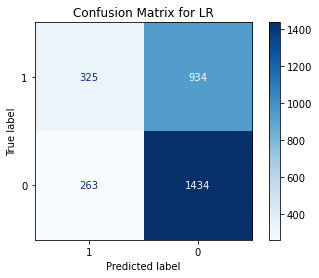

In [110]:
plot_confusion_matrix(lr_best, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.title('Confusion Matrix for LR')
plt.show()

__A confusion matrix__ is a tabular summary of the number of correct and incorrect predictions made by a classifier. 

 - True Positives (TP): 325 model predicted a successful IVF outcome and it actually is.
 - True negatives (TN):  1434 model predicted an unsuccessful IVF outcome and it actually is not.
 - False positives (FP): 263 model predicted a successful IVF outcome and it actually is not.
 - False negatives (FN): 934 model predicted an unsuccessful IVF outcome and it actually is.

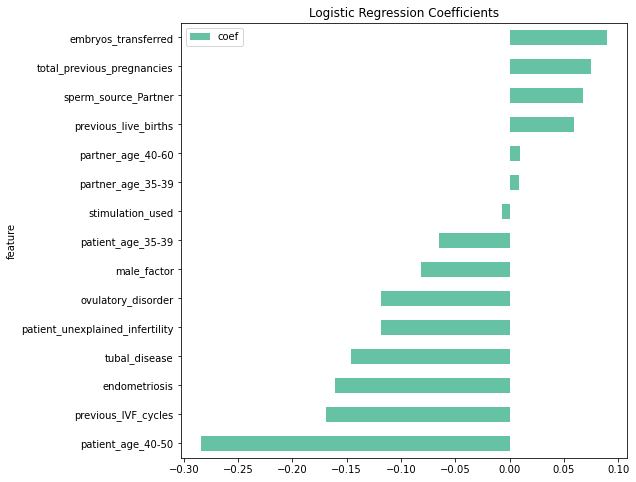

In [111]:
pd.DataFrame(list(zip(X.columns, lr_gridsearch.best_estimator_.coef_[0])), 
             columns=['feature', 'coef'])\
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(8, 8))
plt.title('Logistic Regression Coefficients')
plt.show()

A regression coefficient describes the impact and direction of the relationship between a predictor and the response variable. 

The usual argument for using standardized coefficients is that they provide a means for comparing the effects of variables measured in different metrics.

__ROC Curve__

###### 

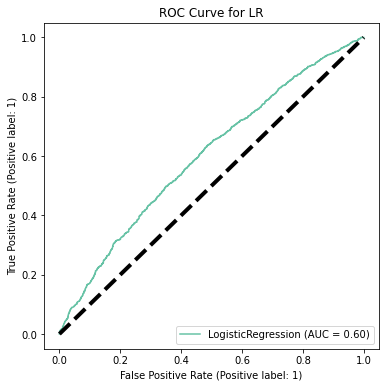

In [112]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(lr_best, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.title('ROC Curve for LR')
plt.show()

The term ROC stands for Receiver Operating Characteristic.

The ROC curve of a good classifier is closer to the top left of the graph. Because in a good classifier, we can achieve high TP at low FP rates.

The area under the ROC curve can be used as a criterion to measure the model's discriminative ability.

In [113]:

cmap = ListedColormap(sns.color_palette("husl", len(lr_best.classes_)))

In [114]:
lr_predictions2 = lr_best.predict_proba(X_test)

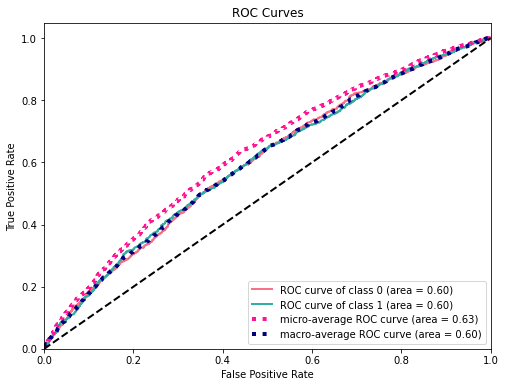

In [115]:
skplt.metrics.plot_roc(y_test, lr_predictions2, cmap=cmap, figsize=(8, 6))
plt.show()

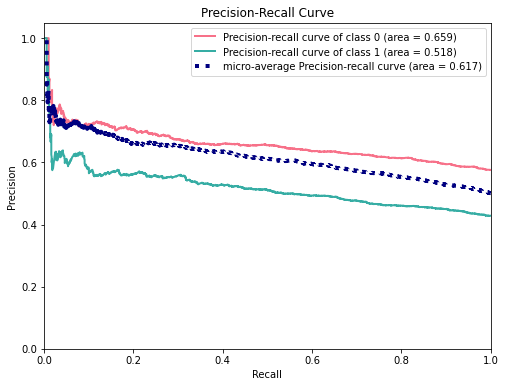

In [116]:
cmap = ListedColormap(sns.color_palette("husl", len(lr_best.classes_)))
skplt.metrics.plot_precision_recall(y_test, lr_predictions2, cmap=cmap, figsize=(8, 6))
plt.show()

**Support Vector Classifier**

SVM attempts to construct a hyperplane (like a straight, 1D line in a 2D space), such that it separates the objects into classes, similarly to logistic regression. SVM, however, is concerned with finding the line that has the greatest distance to the nearest training data point.

SVM tends to perform well if the categories are linearly separable and there is clear separation between the classes. Overlap between the classes (or noise) tends to degrade performance. Although it is a memory-efficient algorithm, it tends to take a while—especially on large datasets.

In [117]:
param_grid = {'C': [1000, 1400, 1650], #Regularization parameter.
              'gamma': [ 0, 0.001, 0.002],# defines how far influences the calculation of plausible line of separation
              'kernel': ['rbf']} #The RBF kernel function for two points X₁ and X₂ computes the similarity or how close they are to each other.
 
grid_svc = GridSearchCV(SVC(), param_grid, refit = True,cv =5)
 
#What fit does : it runs the same loop with cross-validation, to find the best
#parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cv), 
#to build a single new model using the best parameter setting.

In [118]:
# fitting the model for grid search
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1000, 1400, 1650], 'gamma': [0, 0.001, 0.002],
                         'kernel': ['rbf']})

In [119]:
svc_taining_score = grid_svc.best_estimator_.score(X_train, y_train)
svc_cv_score = grid_svc.best_score_
svc_test_score = grid_svc.best_estimator_.score(X_test, y_test)

In [120]:
print('SVM Grid Search: ')
print('Score on training data: ',svc_taining_score)
print('Cross-validated score of the best_estimator: ', svc_cv_score)
print('Score on test data: ',svc_test_score)

SVM Grid Search: 
Score on training data:  0.5980881482108112
Cross-validated score of the best_estimator:  0.5914895025094529
Score on test data:  0.5872801082543978


In [121]:
svc_best = grid_svc.best_estimator_

In [122]:
svc_predictions = svc_best.predict(X_test)
  
# print classification report
print(classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

           0       0.59      0.89      0.71      1697
           1       0.55      0.18      0.27      1259

    accuracy                           0.59      2956
   macro avg       0.57      0.53      0.49      2956
weighted avg       0.57      0.59      0.52      2956



In [123]:
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)

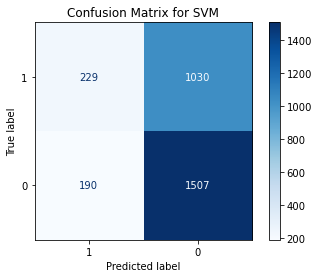

In [124]:
plot_confusion_matrix(svc_best, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.title('Confusion Matrix for SVM')
plt.show()

SVM tries to find the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not.

One of the ways to evaluate SVC model is by creating a Histogram of Projections. Despite working with high dimensional feature spaces, this chart visualises the decision boundary region without loss of dimensionality. This is something I would like to explore in the future, so I can get a better understanding of high dimensional models.



**GradientBoostingClassifier**

In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. But the fascinating idea behind Gradient Boosting is that instead of fitting a predictor on the data at each iteration, it actually fits a new predictor to the residual errors made by the previous predictor. 

Gradient Boosting has three main components:
 - Loss Function: to estimate how good the model is at making predictions with the given data. 
 - Weak Learner: it classifies our data with high error rate. 
 - Additive Model:  each iteration should reduce the value of our loss function.
 
Unlike random forests, the decision trees in gradient boosting are built additively; in other words, each decision tree is built one after another.

Overall, gradient boosting usually performs better than random forests but they’re prone to overfitting.

In [125]:
parameters = {
    "n_estimators":[5,15,20,100], #The number of boosting stages to perform. 
    "max_depth":[3,5,7], #maximum depth of the individual regression estimators.
    "learning_rate":[0.1,0.25,0.5] #learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
    }

gbc_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5)


In [126]:
gbc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.25, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [5, 15, 20, 100]})

In [127]:
gbc_taining_score = gbc_grid.best_estimator_.score(X_train, y_train)
gbc_cv_score = gbc_grid.best_score_
gbc_test_score = gbc_grid.best_estimator_.score(X_test, y_test)

In [128]:
print('GradientBoostingClassifier Grid Search: ')
print('Score on training data: ',gbc_taining_score)
print('Cross-validated score of the best_estimator: ', gbc_cv_score)
print('Score on test data: ',gbc_test_score)

GradientBoostingClassifier Grid Search: 
Score on training data:  0.6143304288977244
Cross-validated score of the best_estimator:  0.5904748464458063
Score on test data:  0.5828822733423545


In [129]:
gbc_grid.best_params_

{'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 100}

In [130]:
gbc_best = gbc_grid.best_estimator_


In [131]:
gbc_predictions = gbc_best.predict(X_test)
  
# print classification report
print(classification_report(y_test, gbc_predictions))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68      1697
           1       0.52      0.31      0.39      1259

    accuracy                           0.58      2956
   macro avg       0.56      0.55      0.53      2956
weighted avg       0.57      0.58      0.56      2956



In [132]:
gbc_accuracy = accuracy_score(y_test, gbc_predictions)
gbc_precision = precision_score(y_test, gbc_predictions)

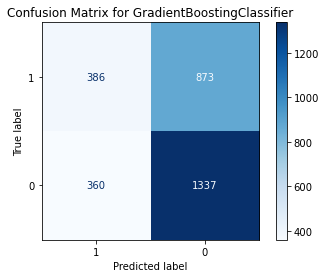

In [133]:
plot_confusion_matrix(gbc_best, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.show()

**KNN Classifier**

This classifier works by comparing each data point to its  nearest neighbours, where  is some arbitrary integer. For example, if k = 5, an unknown data point will be compared to the five closest known points. The data point will be classified as belonging to the most populous group among the five neighbours. 

Technically, this algorithm doesn't "learn" the way that the others do. Rather, it looks for similarities between objects. KNN makes no assumptions about the data, and doesn't require quite as much data preparation as other algorithms. 

KNN proves to be very sensitive to the scale of the dataset and it can be thrown off by irrelevant features fairly easily in comparison to other models.

In [134]:
knn_params = {
    'n_neighbors': [ 80, 100, 150], #chosen number of neighbours
    'weights': ['uniform', 'distance'], #uniform, all points in each neighbourhood have equal influence in predicting class i.e. predicted class is the class with highest number of points in the neighbourhood. If set to distance, closer neighbours will have greater influence than neighbours further away i
    'metric': ['euclidean', 'manhattan','minkowski']}#The distance metric 




knn_grid = GridSearchCV(KNeighborsClassifier(),
                              knn_params,
                              cv=5)

knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [80, 100, 150],
                         'weights': ['uniform', 'distance']})

In [135]:
knn_taining_score = knn_grid.best_estimator_.score(X_train, y_train)
knn_cv_score = knn_grid.best_score_
knn_test_score = knn_grid.best_estimator_.score(X_test, y_test)

In [136]:
print('KNN Grid Search: ')
print('Score on training data: ',knn_taining_score)
print('Cross-validated score of the best_estimator: ', knn_cv_score)
print('Score on test data: ',knn_test_score)

KNN Grid Search: 
Score on training data:  0.5983419338465443
Cross-validated score of the best_estimator:  0.5850606525650794
Score on test data:  0.5842354533152909


In [137]:
knn_best = knn_grid.best_estimator_

In [138]:
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 150, 'weights': 'uniform'}

In [139]:
knn_predictions = knn_best.predict(X_test)
  
# print classification report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.60      0.85      0.70      1697
           1       0.53      0.23      0.32      1259

    accuracy                           0.58      2956
   macro avg       0.56      0.54      0.51      2956
weighted avg       0.57      0.58      0.54      2956



In [140]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)

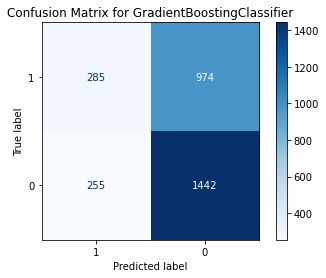

In [141]:
plot_confusion_matrix(knn_best, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.show()

**Decision Tree Classifier**

They make decisions by splitting the data into two or more sets based on some differentiator in the data. This process repeats until each data sample is in a leaf of the tree.

In Decision Tree the major challenge is to identification of the attribute for the root node in each level and it can end up creating over-complex trees that do not generalise the data well. 

In [142]:
dtc_params = {
    'max_depth': [3, 5,7,9], #tree depth 
    'max_features': range(1, X.shape[1]+1),
    'min_samples_split': [2, 3, 4], #controls which splits will be considered. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. 
    'ccp_alpha': [0.0001, 0.0004, 0.0006] #provides a threshold for effective alphas, i.e. the process of pruning continues until the minimal effective alpha of the pruned tree is not greater than ccp_alpha
}


dtc_grid = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5)

In [143]:
dtc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0001, 0.0004, 0.0006],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': range(1, 16),
                         'min_samples_split': [2, 3, 4]})

In [144]:
dtc_taining_score = dtc_grid.best_estimator_.score(X_train, y_train)
dtc_cv_score = dtc_grid.best_score_
dtc_test_score = dtc_grid.best_estimator_.score(X_test, y_test)

In [145]:
print('DecisionTreeClassifier Grid Search: ')
print('Score on training data: ',dtc_taining_score)
print('Cross-validated score of the best_estimator: ', dtc_cv_score)
print('Score on test data: ',dtc_test_score)

DecisionTreeClassifier Grid Search: 
Score on training data:  0.579054225530835
Cross-validated score of the best_estimator:  0.5858212868860962
Score on test data:  0.5791610284167794


In [146]:
dtc_best = dtc_grid.best_estimator_

In [147]:
dtc_predictions = dtc_best.predict(X_test)
  
# print classification report
print(classification_report(y_test, dtc_predictions))

              precision    recall  f1-score   support

           0       0.59      0.87      0.70      1697
           1       0.52      0.19      0.28      1259

    accuracy                           0.58      2956
   macro avg       0.55      0.53      0.49      2956
weighted avg       0.56      0.58      0.52      2956



In [148]:
dtc_accuracy = accuracy_score(y_test, dtc_predictions)
dtc_precision = precision_score(y_test, dtc_predictions)

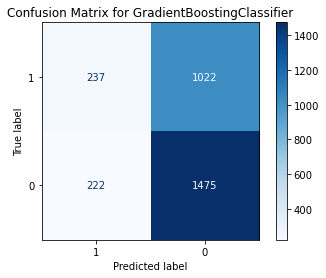

In [149]:
plot_confusion_matrix(dtc_best, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.show()

In [150]:
performance_data = {'model': ["Logistic Regression", "Support-Vector Classifier","Gradient Boosting Classifier",'KNN Classifier','Decision Tree Classifier'],
        'test_accuracy': [lr_accuracy, svc_accuracy, gbc_accuracy, knn_accuracy, dtc_accuracy],
        'precision_score': [lr_precision, svc_precision, gbc_precision, knn_precision, dtc_precision],
        'cv_score': [lr_cv_score, svc_cv_score, gbc_cv_score, knn_cv_score, dtc_cv_score]
        }
performance_df = pd.DataFrame(data=performance_data)

performance_df.head(7)

,model,test_accuracy,precision_score,cv_score
0,Logistic Regression,0.595061,0.552721,0.587429
1,Support-Vector Classifier,0.587280,0.546539,0.591490
2,Gradient Boosting Classifier,0.582882,0.517426,0.590475
3,KNN Classifier,0.584235,0.527778,0.585061
4,Decision Tree Classifier,0.579161,0.516340,0.585821


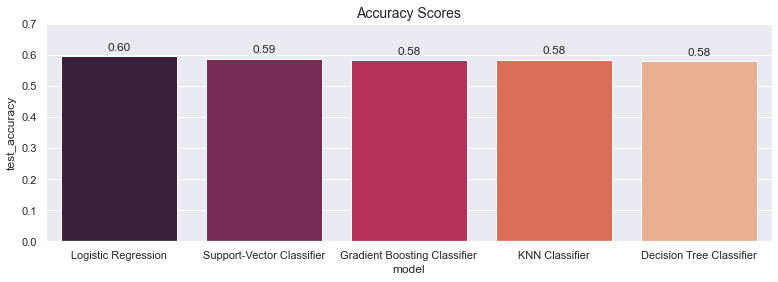

In [151]:
sns.set(rc= {'figure.figsize':(13,4)})
ax = sns.barplot(x='model', y='test_accuracy', data=performance_df, palette="rocket")
ax.axes.set_title("Accuracy Scores", fontsize=14)
ax.set(ylim=(.0, 0.70))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.show()

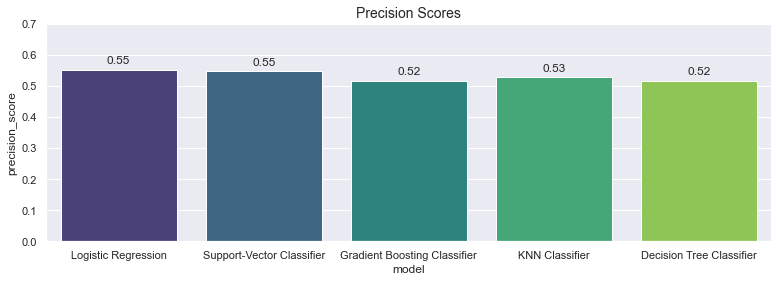

In [152]:
ax = sns.barplot(x='model', y='precision_score', data=performance_df, palette="viridis")
ax.axes.set_title("Precision Scores", fontsize=14)
ax.set(ylim=(.0, 0.70))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.show()

### Conclusions


The best precision score was achieved by Logistic Regression & Support-Vector Classifier. However, it took a lot longer for SVC to run and the interpretation of this model is not as transparent. 

Logistic Regression performed best in terms of accuracy score as well. Gradient boosted and Decision Tree stumps add extra machinery, so in this project Logistic regression will efficiently compute the best results.
  
 
> The relevant independent variables according to the positive coefficient: the number of embryos transferred, number of previous pregnancies & births, the source of sperm. 
 
> The relevant independent variables with negative coefficients: patient age (40-50), number of previous IVF cycles, endometriosis, tubal disease, ovulatory disorder, unexplained infertility and malefactor.

### Recommendations

1. One of the most important factors that influence the success of IVF is a lifestyle. If one of the partners smokes excessively, the chances of conceiving are greatly reduced. Another lifestyle factor affecting IVF success rate is weight. Collecting and incorporating the data in relation to these factors would potentially improve the performance of the models.
 
2. Environmental factors also play an important role in the quality of eggs and sperm which are required for IVF success. It would be interesting to see how location data influence the modelling.
 
3. Perhaps one of the other interesting external factors is the clinic chosen by the couple for their treatment. For individual clinics, the potential areas that could be investigated further are the lab’s success rates to laboratory standards, air quality, and the experience of the embryologists.


### Next Steps

1. Use the full dataset for modelling.


2. I would like to challenge myself further and create a database using data from Excel spreadsheets available on the HFEA website. 
- Databases can store very large numbers of records efficiently. 
- It will be very quick and easy to find information. 
- Data can be imported into other applications.